Heart Disease Prediction Using ML

Here, in this project we will be predicting whether the person with given measures of health is suffering from heart disease or not. We will do so with the help of a machine learning model.
We will be going through the following steps to achive our aim.

Importing all the basic libraries required for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split

Importing all the libraries concerned with the ml models used in the project

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Now we will be importing our dataset upon which our model can be trained


In [3]:
dataset = pd.read_csv('/content/heart.csv')
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Visualization of histogram for different variables and the frequencies of each of their values in the dataset

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

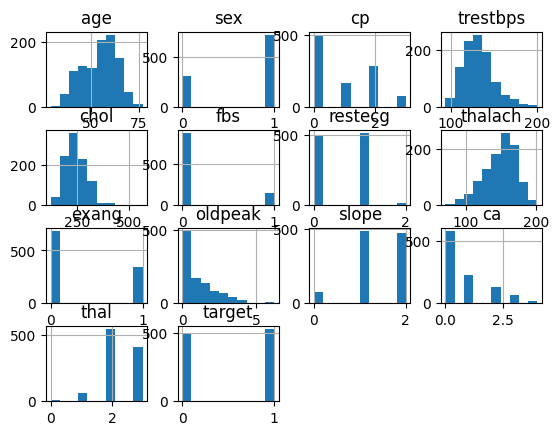

In [5]:
dataset.hist()

Dropping the 'target' column and assigning it to another variable to have a dataset of all the independent variables and another to have the dependent variable column

In [6]:
Y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 2)

Applying Logistic Regression

In [7]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, Y_train)
score = lr_classifier.score(X_test, Y_test)
print("The score for Logistic Regression is ",score*100,"%")

The score for Logistic Regression is  79.76653696498055 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Applying K - Nearest Neighbors

In [8]:
knn_scores = []
for k in range (1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(X_train, Y_train)
  knn_scores.append(knn_classifier.score(X_test, Y_test))
for i in range (1,21):
  knn_scores[i-1] = round(knn_scores[i-1], 2)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different score values')

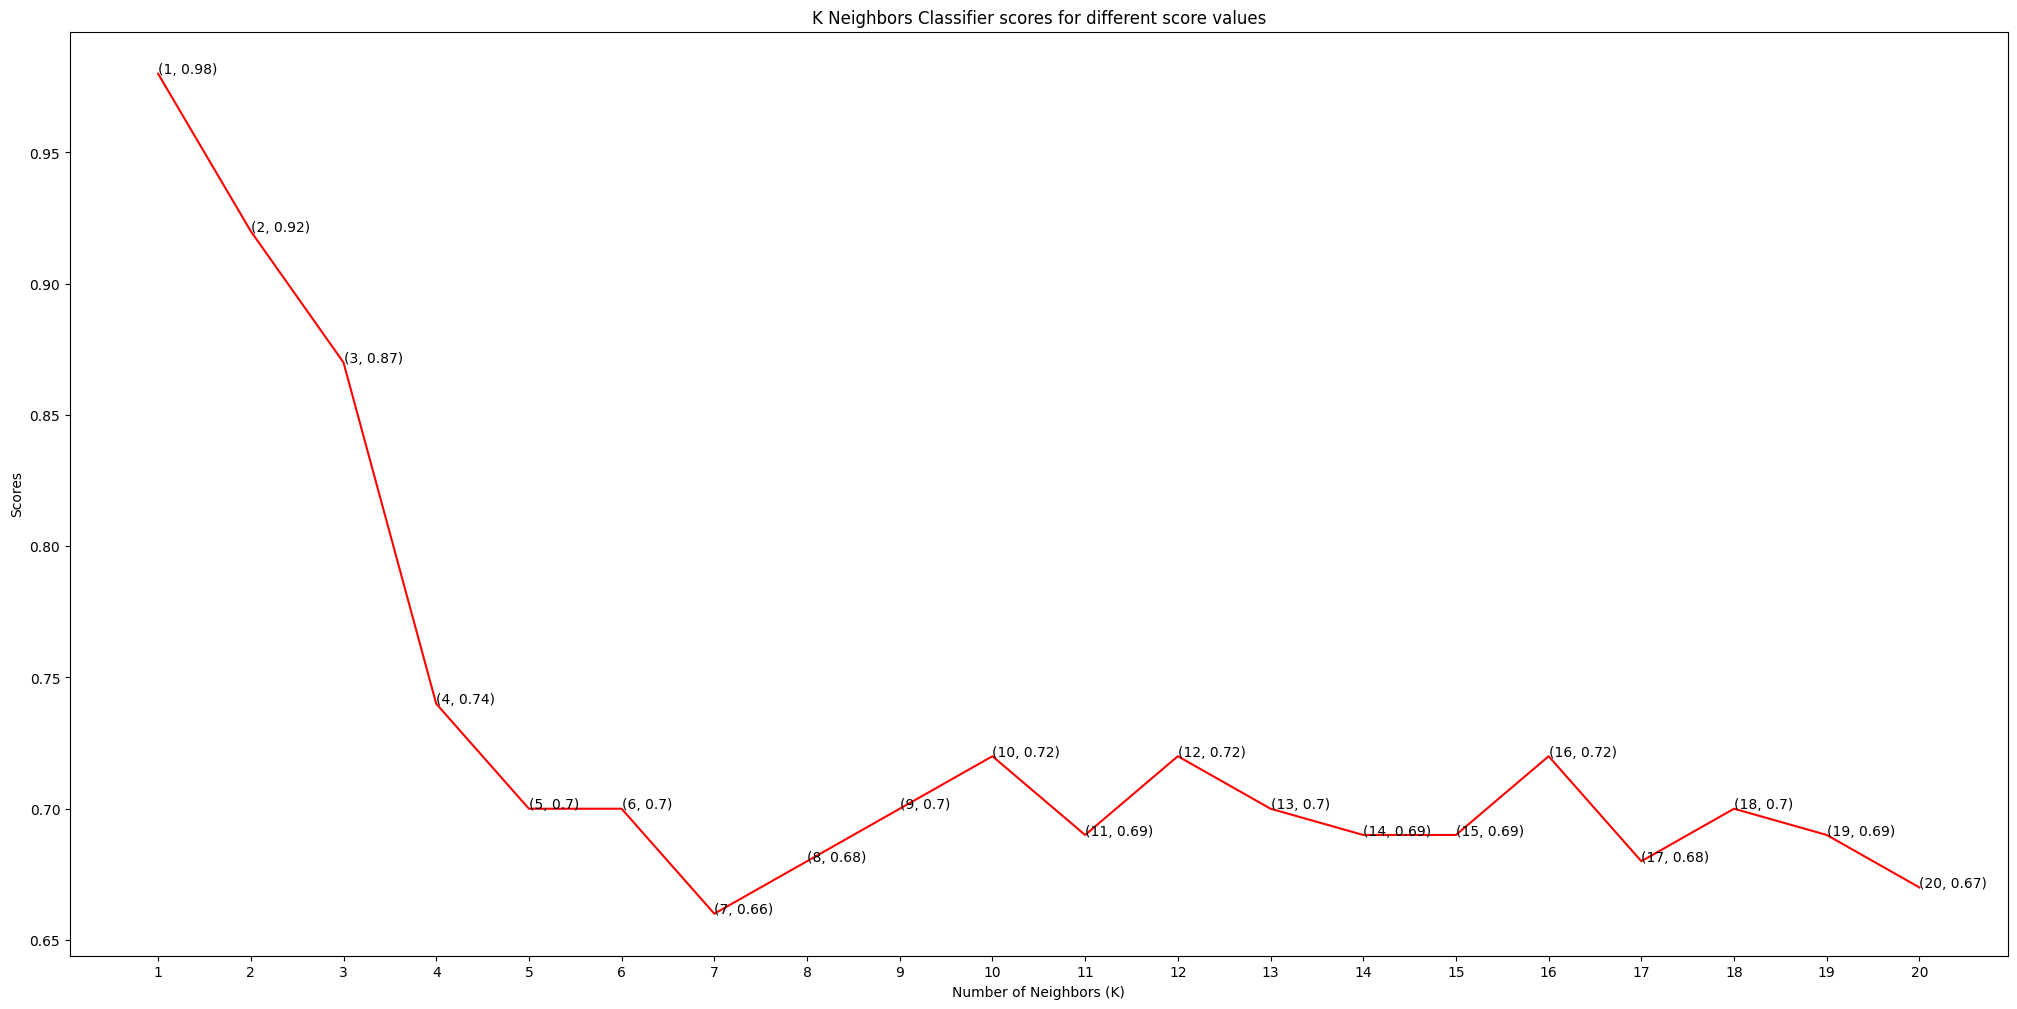

In [9]:
rcParams['figure.figsize'] = 25, 12
plt.plot([k for k in range (1, 21)], knn_scores, color = 'red')
for i in range (1, 21):
  plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range (1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different score values')

In [18]:
print("The score for K Neighbors Classifier {}% with {} neighbors.".format(knn_scores[0]*100, 1))

The score for K Neighbors Classifier 98.0% with 1 neighbors.


Applying Support Vector Classifier

In [10]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
  svc_classifier = SVC(kernel = kernels[i])
  svc_classifier.fit(X_train, Y_train)
  svc_scores.append(svc_classifier.score(X_test, Y_test))
for i in range (len(kernels)):
  svc_scores[i] = round(svc_scores[i], 2)

Text(0.5, 1.0, 'Support Vector Classifier for different scores')

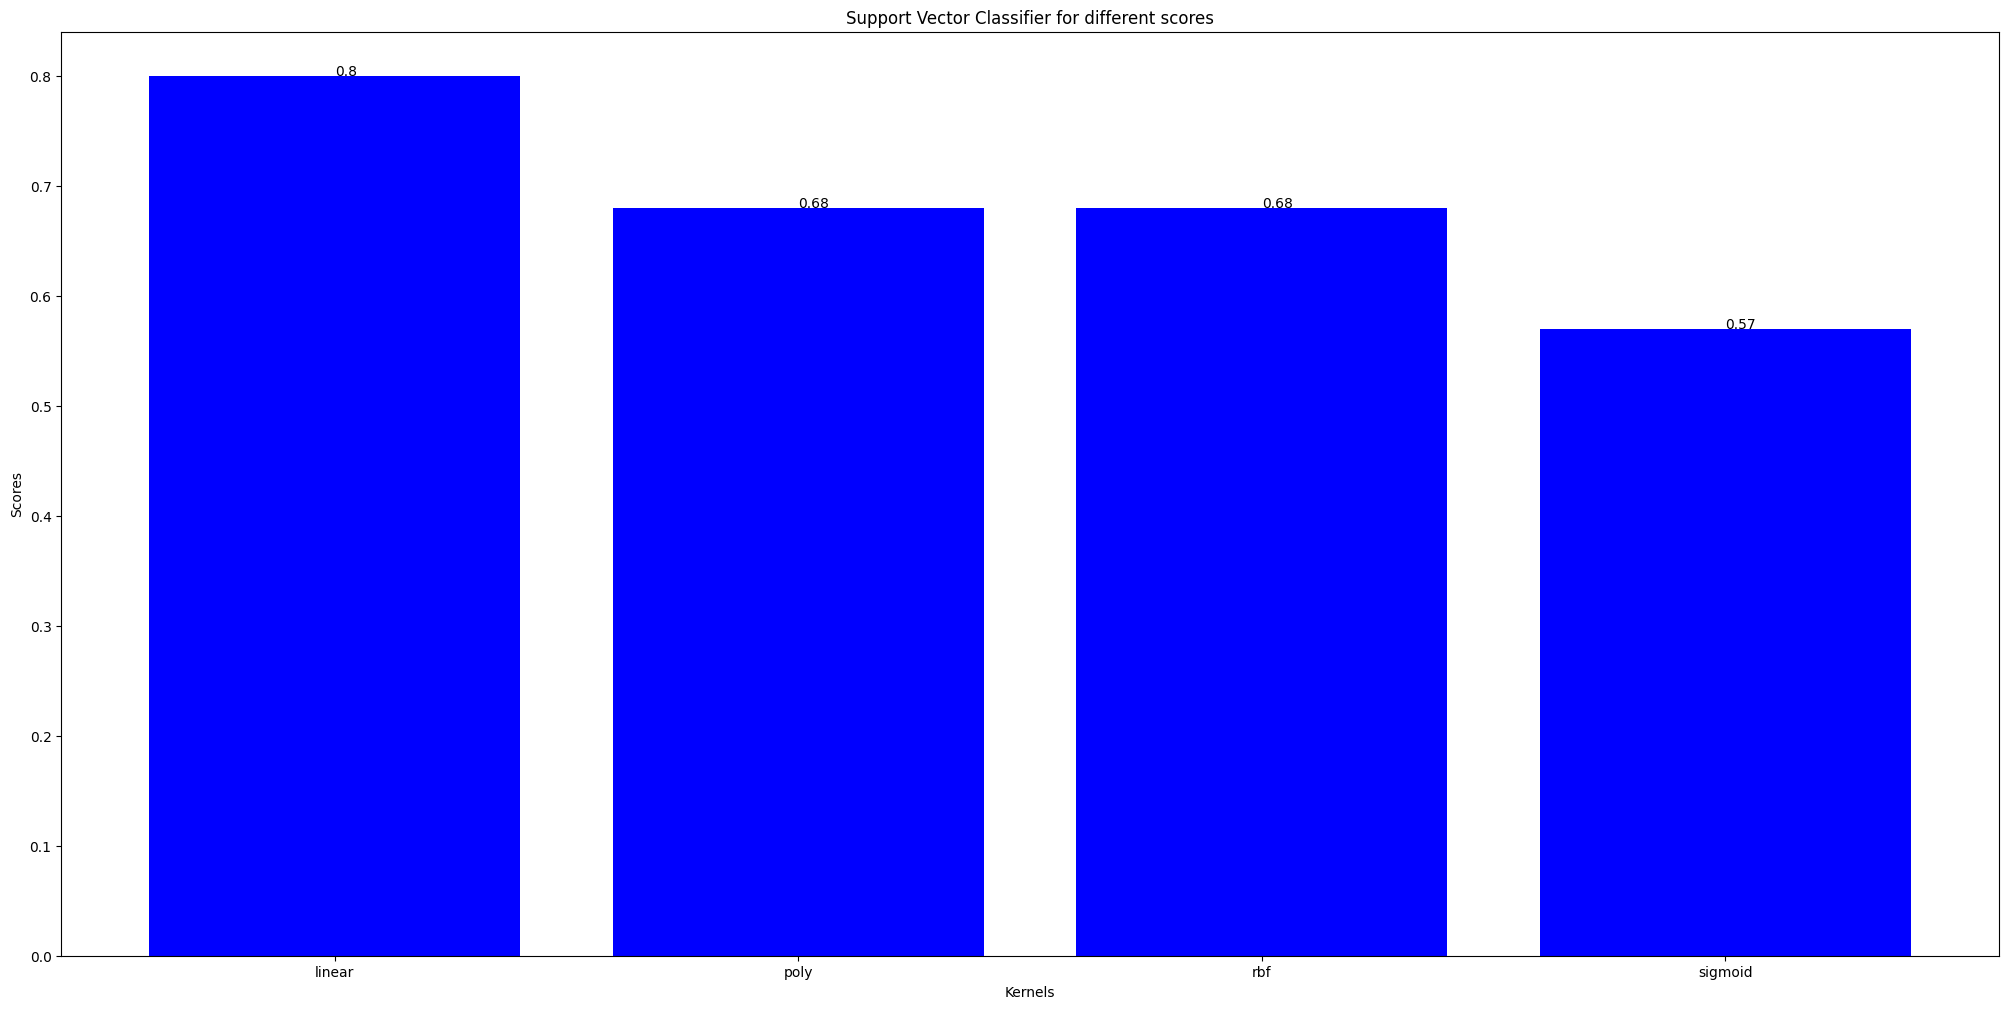

In [13]:
rcParams['figure.figsize'] = 25, 12
plt.bar(kernels, svc_scores, color = "blue")
for i in range (len(kernels)):
  plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier for different scores')

In [17]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 80.0% with linear kernel.


Applying Decision Tree Classifier

In [14]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
  dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 2)
  dt_classifier.fit(X_train, Y_train)
  dt_scores.append(dt_classifier.score(X_test, Y_test))
for i in range (1, len(X.columns) + 1):
  dt_scores[i-1] = round(dt_scores[i-1], 2)

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

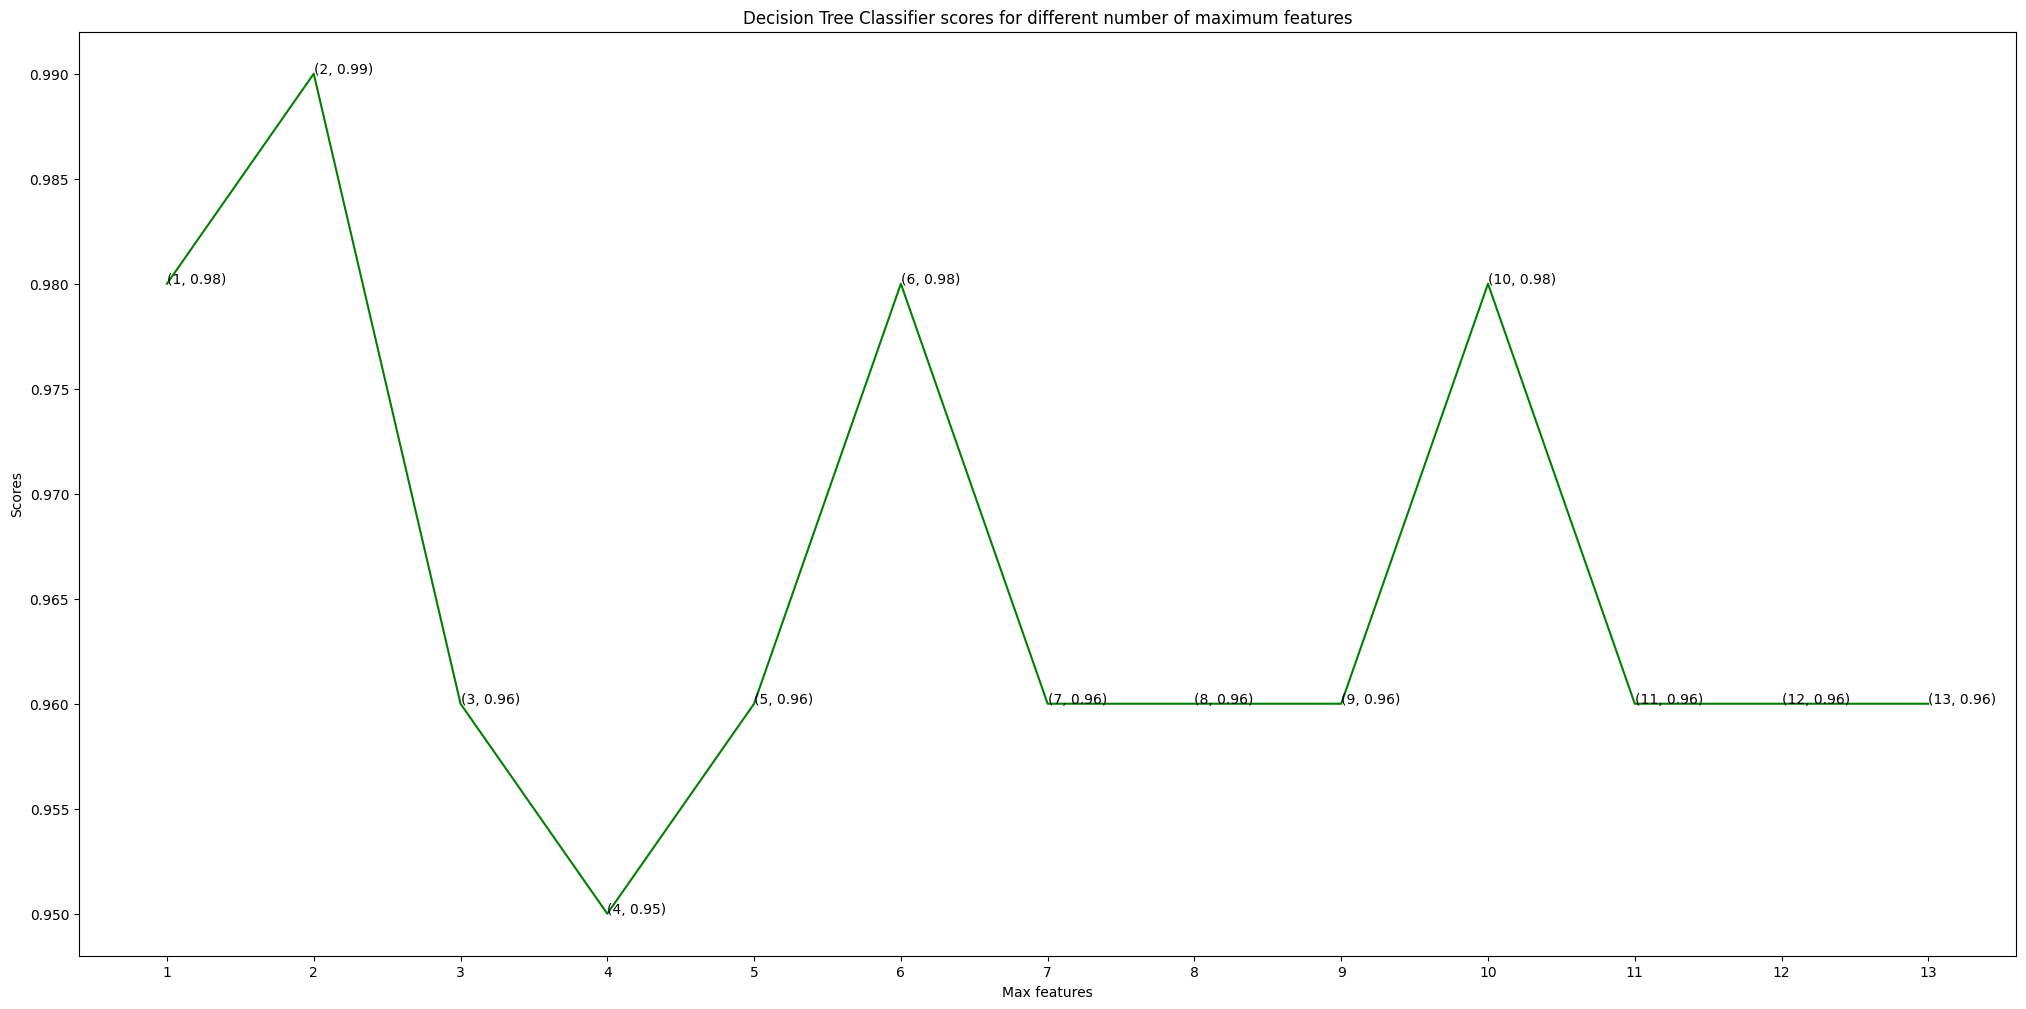

In [15]:
rcParams['figure.figsize'] = 25, 12
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
  plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [16]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[1]*100, [2]))

The score for Decision Tree Classifier is 99.0% with [2] maximum features.


Predicting whether the given person has Heart disease or not

In [19]:
input_example = pd.DataFrame({
    'age': [63],
    'sex': [1],
    'cp': [3],
    'trestbps': [145],
    'chol': [233],
    'fbs': [1],
    'restecg': [0],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [2.3],
    'slope': [0],
    'ca': [0],
    'thal': [1]
})
model  = DecisionTreeClassifier(max_features = 2, random_state = 2)
model.fit(X_train, Y_train)
prediction = model.predict(input_example)
print(prediction)
if(prediction[0] == 0):
  print("The person does not have a heart disease")
else:
  print("The person has a heart disease")

[1]
The person has a heart disease
